##### TASK: To Write a Python program to calculate the total deposits, identify the top 3 customers by deposit, the top 2 customers by withdrawal, calculate the net balance per customer, and group the transactions by month to determine the total deposit and withdrawal amounts for each month

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bank_cust_list.csv")
df.head()

,transaction_id,customer_id,transaction_type,amount,timestamp
0,T001,C001,deposit,5000,01/10/2025 9:30
1,T002,C002,withdrawal,1500,01/11/2025 10:45
2,T003,C003,deposit,3000,01/12/2025 11:20
3,T004,C001,withdrawal,2000,1/14/2025 14:00
4,T005,C004,deposit,7000,1/16/2025 15:10


In [10]:
df.isna().sum()

transaction_id      0
customer_id         0
transaction_type    0
amount              0
timestamp           0
dtype: int64

In [11]:
df.dtypes

transaction_id      object
customer_id         object
transaction_type    object
amount               int64
timestamp           object
dtype: object

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M') # to make the format for timestamp proper
df["timestamp"]

0    2025-01-10 09:30:00
1    2025-01-11 10:45:00
2    2025-01-12 11:20:00
3    2025-01-14 14:00:00
4    2025-01-16 15:10:00
5    2025-01-18 16:00:00
6    2025-01-19 10:10:00
7    2025-01-20 09:00:00
8    2025-02-01 13:00:00
9    2025-02-05 14:45:00
10   2025-02-07 11:30:00
11   2025-02-10 10:10:00
12   2025-02-11 12:25:00
13   2025-02-14 15:20:00
14   2025-02-15 10:10:00
15   2025-02-17 13:35:00
16   2025-03-01 08:00:00
17   2025-03-03 09:40:00
18   2025-03-05 14:00:00
19   2025-03-07 10:00:00
20   2025-03-08 11:10:00
21   2025-03-10 15:30:00
22   2025-03-12 17:00:00
Name: timestamp, dtype: datetime64[ns]

#### Report Metrics

In [13]:
total_deposit = df[df['transaction_type'] == 'deposit']['amount'].sum()

deposits = df[df['transaction_type'] == 'deposit'].groupby('customer_id')['amount'].sum()
top3_deposit = deposits.sort_values(ascending=False).head(3)

withdraws = df[df['transaction_type'] == 'withdrawal'].groupby('customer_id')['amount'].sum()
top2_withdraw = withdraws.sort_values(ascending=False).head(2)

net_balance = deposits.subtract(withdraws, fill_value=0)

df['month'] = df['timestamp'].dt.strftime('%Y-%m') # for sorting by month
monthly_summary = df.groupby(['month', 'transaction_type'])['amount'].sum().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

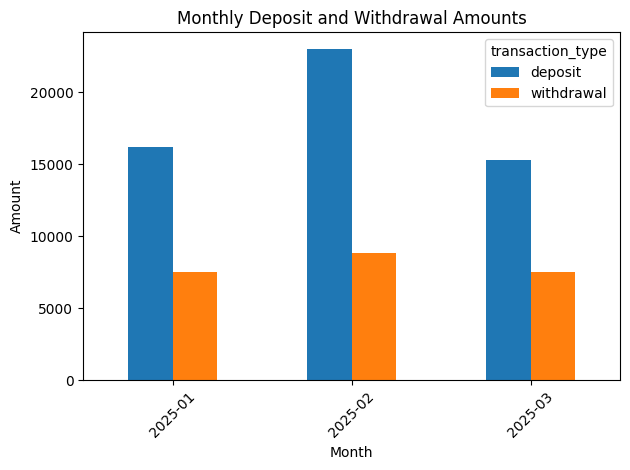

In [14]:
plt.figure(figsize=(10, 6))
monthly_summary.plot(kind='bar')
plt.title("Monthly Deposit and Withdrawal Amounts")
plt.ylabel("Amount")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

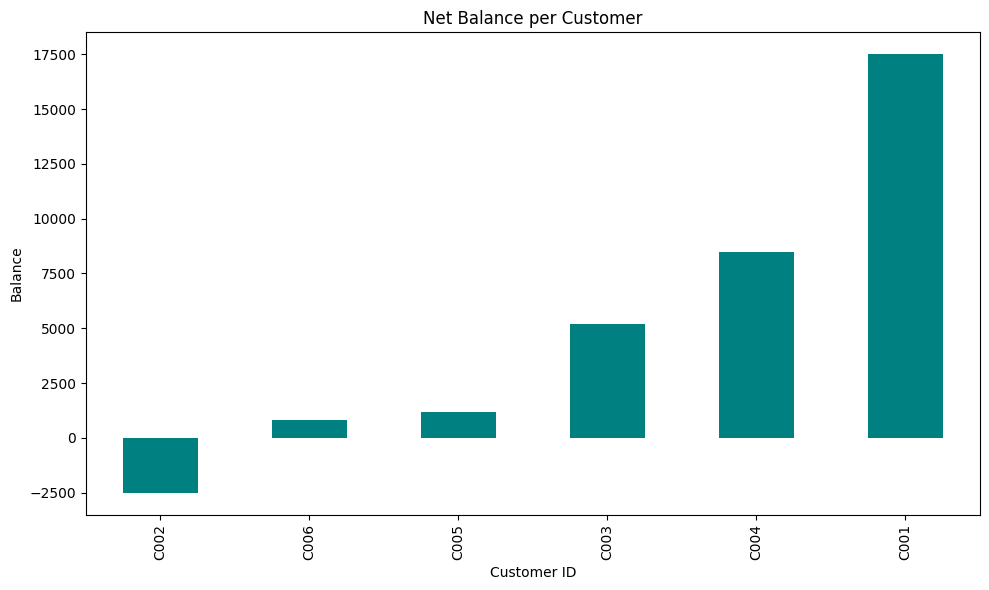

In [15]:
plt.figure(figsize=(10, 6))
net_balance.sort_values().plot(kind='bar', color='teal')
plt.title("Net Balance per Customer")
plt.ylabel("Balance")
plt.xlabel("Customer ID")
plt.tight_layout()
plt.show()

##### Saving

In [16]:
report_path = "report.txt"
with open(report_path, "w") as file:
    file.write("------ Report ------\n\n")
    file.write(f"Total Deposits: {total_deposit}\n\n")
    file.write("Top 3 Customers by Deposit:\n")
    file.write(top3_deposit.to_string() + "\n\n")
    file.write("Top 2 Customers by Withdrawal:\n")
    file.write(top2_withdraw.to_string() + "\n\n")
    file.write("Net Balance per Customer:\n")
    file.write(net_balance.to_string() + "\n\n")
    file.write("Monthly Deposit and Withdrawal Summary:\n")
    file.write(monthly_summary.to_string())

print("------ Report saved ------")

------ Report saved ------
